# Import necessary libraries

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Settings for better notebook display

In [370]:
%matplotlib inline
sns.set(style="whitegrid")

# Load the dataset

In [371]:
data = pd.read_csv('../Hiring Package/GroceryStoreData/CSA Grocery Store.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Preprocessing

## Understand data

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Check for duplicates

In [373]:
data.duplicated().sum()

0

## Check for missing values (null)

In [374]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Convert data types if necessary

In [375]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Add additional features that may be useful

In [376]:
# Calculate the delivery time in days as an integer
data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


## Eliminate columns that do not contribute to the main areas of exploration

Areas of exploration include Sales Trends Over Time, Profitability Analysis and Geographical Analysis

In [377]:
data = data.drop(columns=['Customer ID', 'Customer Name', 'Postal Code'])
data.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


# Data Exploration

## General Data Frame Analysis

Numerical Data

In [378]:
data.describe() 

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Delivery Time
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,229.858001,3.789574,0.156203,28.656896,3.958875
min,1.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2499.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750,3.000000
50%,4997.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,54.490000,3.000000,0.200000,8.666500,4.000000
75%,7495.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,209.940000,5.000000,0.200000,29.364000,5.000000
max,9994.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108,1.747097


Categorial columns 

In [379]:
data.describe(include=['O'])

,Order ID,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,3,1,531,49,4,1862,3,17,1841
top,CA-2014-100111,Standard Class,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staples
freq,14,5968,5191,9994,915,2001,3203,19,6026,1523,227


# Analysis Section 1: Sales Trends Over Time

## Smooth out sales trend and plot with 3-month window

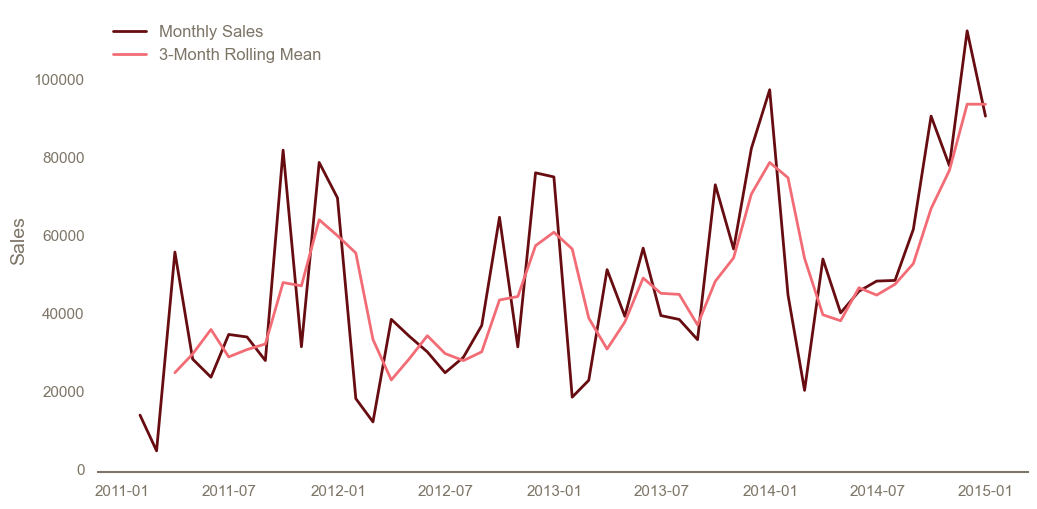

In [380]:
# Resampling to monthly sales data
monthly_sales = data.resample('M', on='Order Date')['Sales'].sum()

# Calculating the rolling mean with a window of 3 months for smoothing
rolling_mean = monthly_sales.rolling(window=3).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', color='#670c10', linewidth=2)
plt.plot(rolling_mean.index, rolling_mean, label='3-Month Rolling Mean', color='#f26c76', linewidth=2)

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
# plt.xlabel('Date', fontsize=14, color=grey_color)
plt.ylabel('Sales', fontsize=14, color=grey_color)
plt.xticks(color=grey_color)
plt.yticks(color=grey_color)
plt.legend(loc='best', fontsize=12, frameon=False, labelcolor=grey_color)  # Updated legend color

# Removing gridlines
plt.grid(False)

# Customizing the borders around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)  # Make the left axis line invisible
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Setting the face color of the plot to white
plt.gca().set_facecolor('white')
plt.show()

## Plot sales trends with seasonal trends considered 

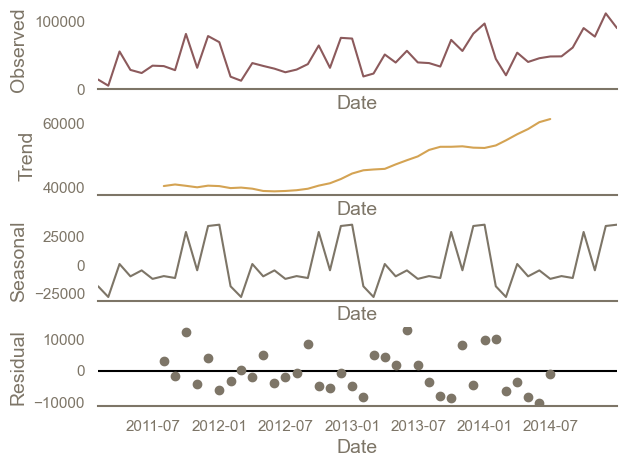

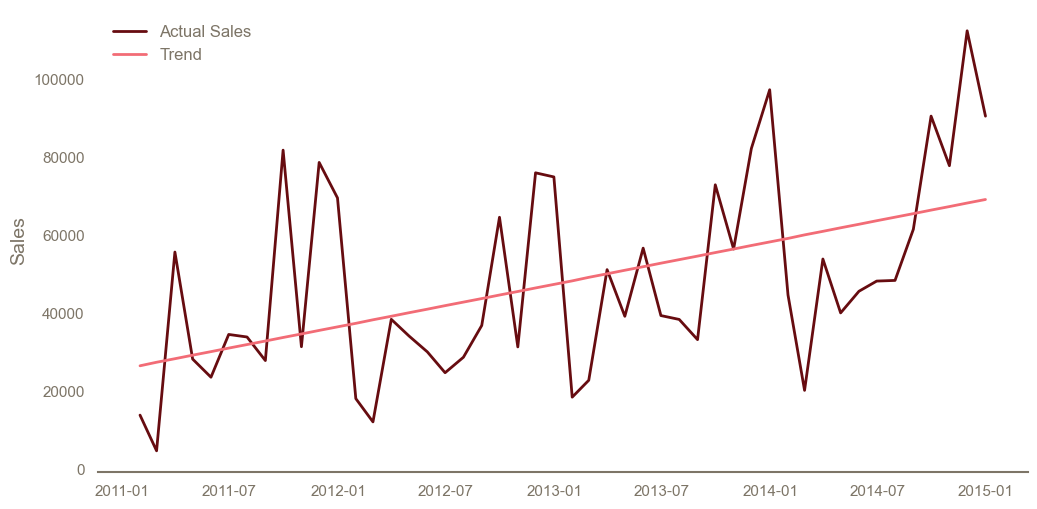

In [381]:
# Decomposing the monthly sales data to observe seasonality, trend, and residuals.
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')

# Plotting the decomposed components
fig = decomposition.plot()

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
colors = ['#8C5A5C', '#D4A353', grey_color]  # Colors for observed, trend, and seasonal/residuals

# Customizing each subplot
for i, ax in enumerate(fig.axes):
    ax.set_title('')  # Remove titles
    ax.set_ylabel(['Observed', 'Trend', 'Seasonal', 'Residual'][i], fontsize=14, color=grey_color)
    ax.tick_params(axis='x', colors=grey_color)
    ax.tick_params(axis='y', colors=grey_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color(grey_color)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_facecolor('white')
    ax.grid(False)  # Remove gridlines
    ax.set_xlabel('Date', fontsize=14, color=grey_color)

# Set colors for each component
fig.axes[0].lines[0].set_color(colors[0])  # Observed
fig.axes[1].lines[0].set_color(colors[1])  # Trend
fig.axes[2].lines[0].set_color(colors[2])  # Seasonal
fig.axes[3].lines[0].set_color(colors[2])  # Residual

plt.show()

# To check the growth trend specifically use linear regression model
# First create a time variable that represents the time index
from sklearn.linear_model import LinearRegression

# Create a numerical time index for the linear regression model
time_index = np.arange(len(monthly_sales.index))

# Reshape the time_index to use it in the model
X = time_index.reshape(-1, 1)
y = monthly_sales.values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# The model's coefficient tells us the growth rate
growth_rate = model.coef_

# Predict the sales using the model to visualize the trend
trend = model.predict(X)

# Plotting the actual sales versus the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales', color='#670c10', linewidth=2)
plt.plot(monthly_sales.index, trend, label='Trend', color='#f26c76', linewidth=2)

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
plt.xlabel('', fontsize=14, color=grey_color)
plt.ylabel('Sales', fontsize=14, color=grey_color)
plt.xticks(color=grey_color)
plt.yticks(color=grey_color)
plt.legend(loc='best', fontsize=12, frameon=False, labelcolor=grey_color)  # Updated legend color

# Removing gridlines
plt.grid(False)

# Customizing the borders around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)  # Make the left axis line invisible
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Setting the face color of the plot to white
plt.gca().set_facecolor('white')
plt.show()

# Analysis Section 2-3: Profitability Analysis and Discount Impact on Sales and Profitability 

## Calculate profit ratios and add the information as a feature

In [382]:
data['Profit Ratio'] = (data['Profit'] / data['Sales']) * 100

## Display profit trends 

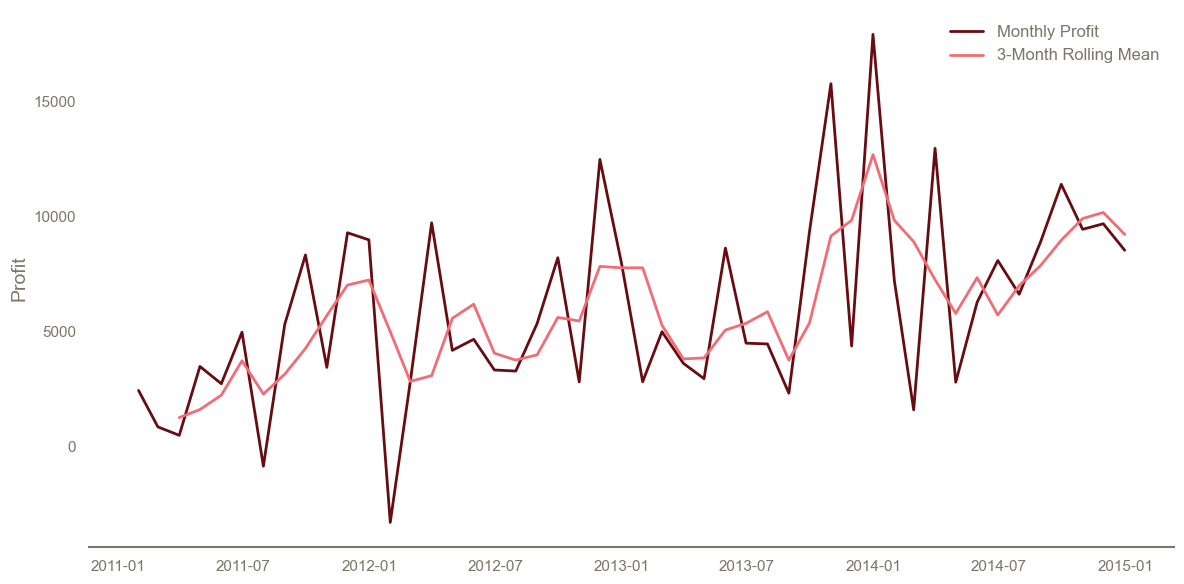

In [383]:
# Resample to get monthly profit data
monthly_profit = data.resample('M', on='Order Date')['Profit'].sum()

# Calculate a 3-month rolling average to smooth the data
rolling_profit = monthly_profit.rolling(window=3).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit, label='Monthly Profit', color='#670c10', linewidth=2)
plt.plot(rolling_profit.index, rolling_profit, label='3-Month Rolling Mean', color='#f26c76', linewidth=2)

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
plt.xlabel('', fontsize=14, color=grey_color)
plt.ylabel('Profit', fontsize=14, color=grey_color)
plt.xticks(color=grey_color)
plt.yticks(color=grey_color)
plt.legend(loc='best', fontsize=12, frameon=False, labelcolor=grey_color)  # Updated legend color

# Removing gridlines
plt.grid(False)

# Customizing the borders around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)  # Make the left axis line invisible
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Setting the face color of the plot to white
plt.gca().set_facecolor('white')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

## Analyze the discounts and how they are utilized

In [384]:
# Descriptive statistics for discounts, sales, and profit
descriptive_stats = data[['Discount', 'Sales', 'Profit']].describe()

# Correlation analysis
correlation_matrix = data[['Discount', 'Sales', 'Profit']].corr()

# Discount distribution across categories and customer segments
discount_by_category = data.groupby('Category')['Discount'].mean()
discount_by_sub_category = data.groupby('Sub-Category')['Discount'].mean()
discount_by_segment = data.groupby('Segment')['Discount'].mean()

# Profitability analysis: average profit by discount range
profit_by_discount_range = data.groupby(pd.cut(data['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5]))['Profit'].mean()

(descriptive_stats, correlation_matrix, discount_by_category, discount_by_sub_category, discount_by_segment, profit_by_discount_range)

/var/folders/np/q9rxp7h96v19y1wfjlnwbjzr0000gn/T/ipykernel_4665/451319926.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount_range = data.groupby(pd.cut(data['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5]))['Profit'].mean()


(          Discount         Sales       Profit
 count  9994.000000   9994.000000  9994.000000
 mean      0.156203    229.858001    28.656896
 std       0.206452    623.245101   234.260108
 min       0.000000      0.444000 -6599.978000
 25%       0.000000     17.280000     1.728750
 50%       0.200000     54.490000     8.666500
 75%       0.200000    209.940000    29.364000
 max       0.800000  22638.480000  8399.976000,
           Discount     Sales    Profit
 Discount  1.000000 -0.028190 -0.219487
 Sales    -0.028190  1.000000  0.479064
 Profit   -0.219487  0.479064  1.000000,
 Category
 Furniture          0.173923
 Office Supplies    0.157285
 Technology         0.132323
 Name: Discount, dtype: float64,
 Sub-Category
 Accessories    0.078452
 Appliances     0.166524
 Art            0.074874
 Binders        0.372292
 Bookcases      0.211140
 Chairs         0.170178
 Copiers        0.161765
 Envelopes      0.080315
 Fasteners      0.082028
 Furnishings    0.138349
 Labels         0.068

## Analyze the correlation between discounts and profit

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


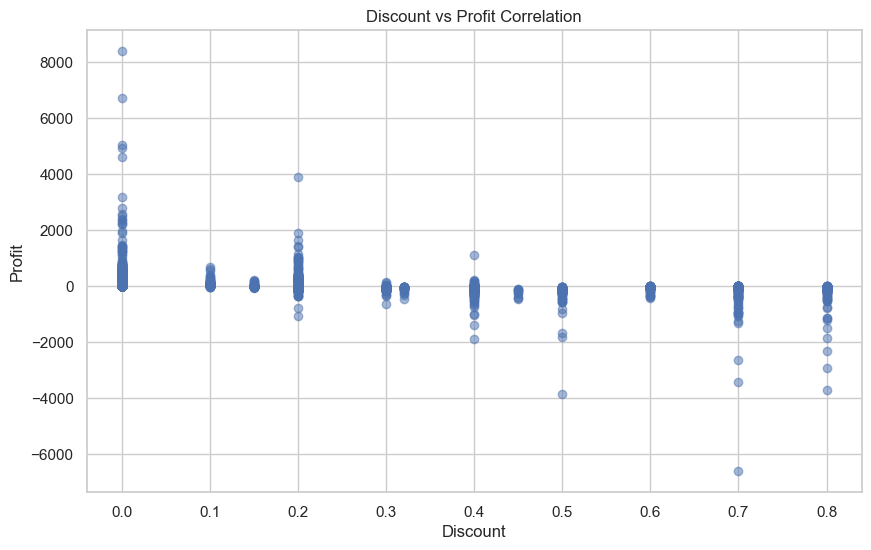

The correlation coefficient between discount and profit is: -0.21948745637176845


In [385]:
# Calculate the correlation coefficient
correlation = data['Discount'].corr(data['Profit'])

# Plotting the relationship between Discount and Profit
plt.figure(figsize=(10, 6))
plt.scatter(data['Discount'], data['Profit'], alpha=0.5)
plt.title('Discount vs Profit Correlation')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Print the correlation
print(f"The correlation coefficient between discount and profit is: {correlation}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     505.7
Date:                Fri, 13 Sep 2024   Prob (F-statistic):          2.70e-109
Time:                        19:39:53   Log-Likelihood:                -68465.
No. Observations:                9994   AIC:                         1.369e+05
Df Residuals:                    9992   BIC:                         1.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

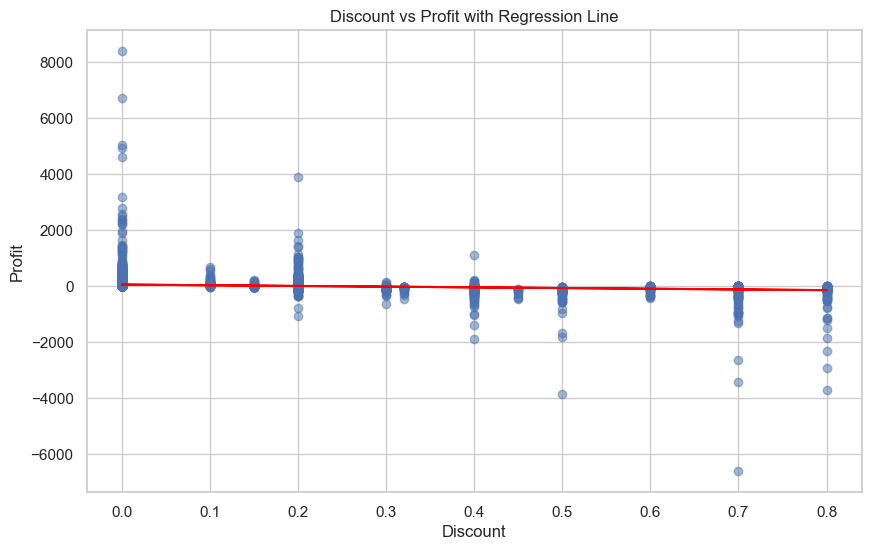

In [386]:
# Prepare the data for regression
X = data['Discount']  # Predictor
y = data['Profit']    # Response

# Add a constant to the predictor
X = sm.add_constant(X)

# Create a model and fit it
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plotting with a fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Discount'], data['Profit'], alpha=0.5)
plt.plot(data['Discount'], model.predict(X), color='red')
plt.title('Discount vs Profit with Regression Line')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

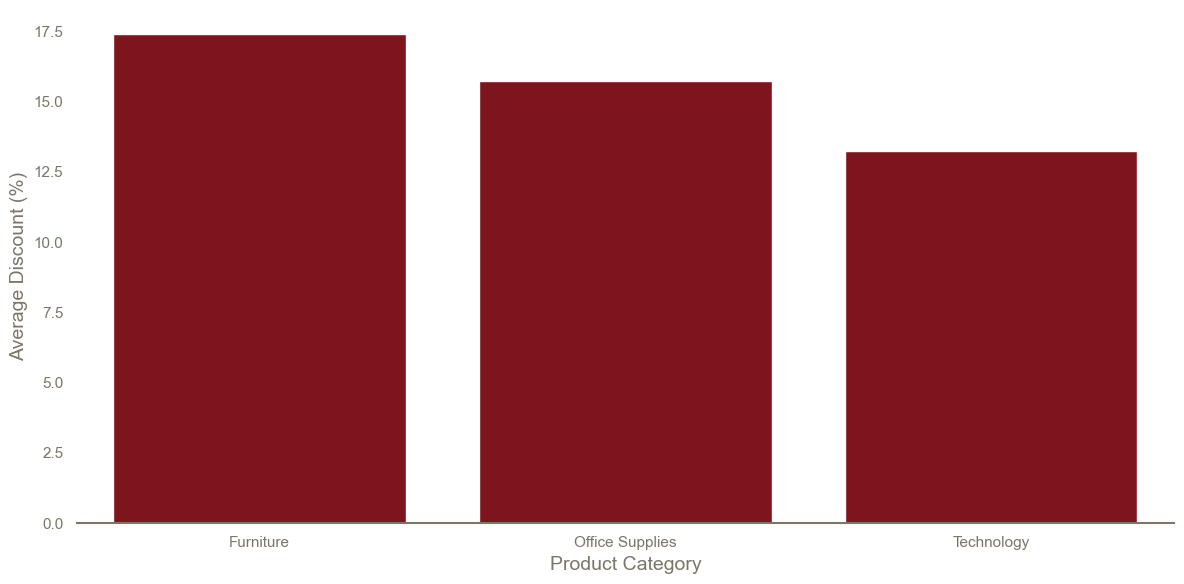

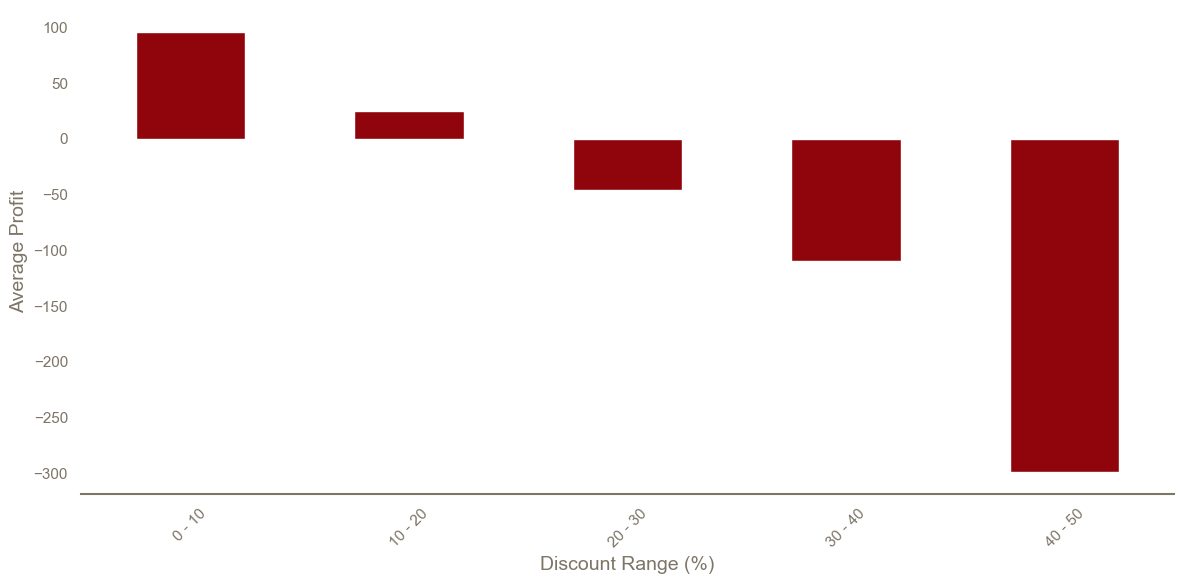

In [387]:
# Custom color palette
category_color = '#90040c'
profit_color = '#90040c'
grey_color = '#7D7567'

# 1. Discount Distribution by Category
plt.figure(figsize=(12, 6))
sns.barplot(x=discount_by_category.index, y=discount_by_category.values * 100, color=category_color)

# Customizing the theme
# plt.title('Average Discount by Product Category', fontsize=16, color=grey_color)
plt.xlabel('Product Category', fontsize=14, color=grey_color)
plt.ylabel('Average Discount (%)', fontsize=14, color=grey_color)
plt.xticks(color=grey_color)
plt.yticks(color=grey_color)

# Customizing the borders around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Removing gridlines
plt.grid(False)

# Setting the face color of the plot to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

# 2. Profitability Analysis by Discount Range
plt.figure(figsize=(12, 6))
profit_by_discount_range.index = profit_by_discount_range.index.map(lambda x: f'{int(x.left * 100)} - {int(x.right * 100)}')
profit_by_discount_range.plot(kind='bar', color=profit_color)

# Customizing the theme
# plt.title('Average Profit by Discount Range', fontsize=16, color=grey_color)
plt.xlabel('Discount Range (%)', fontsize=14, color=grey_color)
plt.ylabel('Average Profit', fontsize=14, color=grey_color)
plt.xticks(color=grey_color, rotation=45)
plt.yticks(color=grey_color)

# Customizing the borders around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Removing gridlines
plt.grid(False)

# Setting the face color of the plot to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

## Identify the most profitable products/categories

Products

In [388]:
# Group by Product Name, sum up Profit, and sort
profit_per_product = data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Display top profitable products
print(profit_per_product.head())

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


Categories

In [389]:
# Group by Category, sum up Profit, and sort
profit_per_category = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Display profitable categories
print(profit_per_category.head())

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


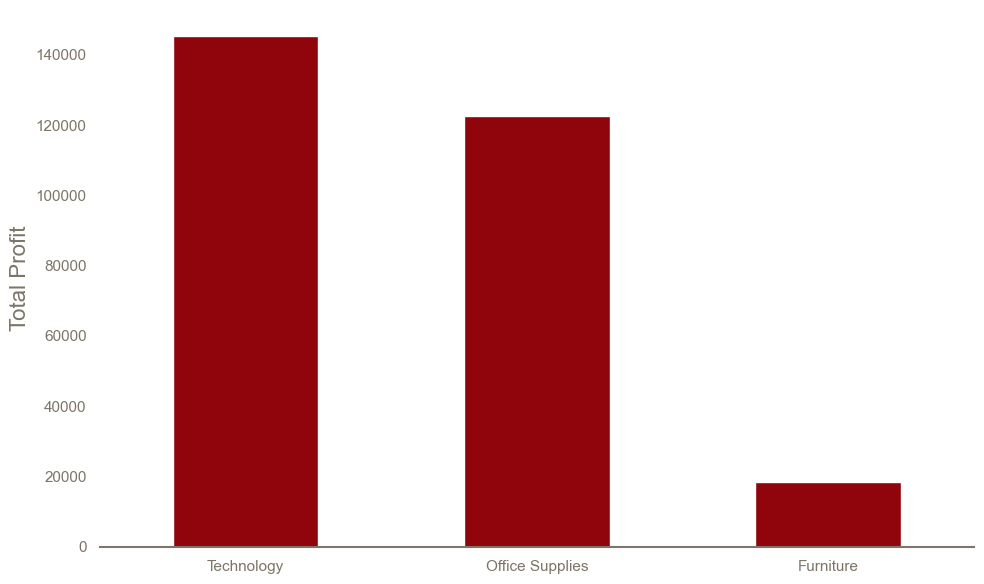

In [390]:
# Create a bar chart for profits per category
profit_per_category.plot(kind='bar', figsize=(10, 6), color='#90040c')  # Updated color

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
# plt.title('Profit by Category', fontsize=16, color=grey_color)
plt.ylabel('Total Profit', fontsize=16, color=grey_color)
plt.xlabel('', fontsize=16, color=grey_color)
plt.xticks(rotation=0, color=grey_color)
plt.yticks(color=grey_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().set_facecolor('white')
plt.grid(False)  # Remove gridlines

plt.tight_layout()  # Adjust layout for better fit
plt.show()

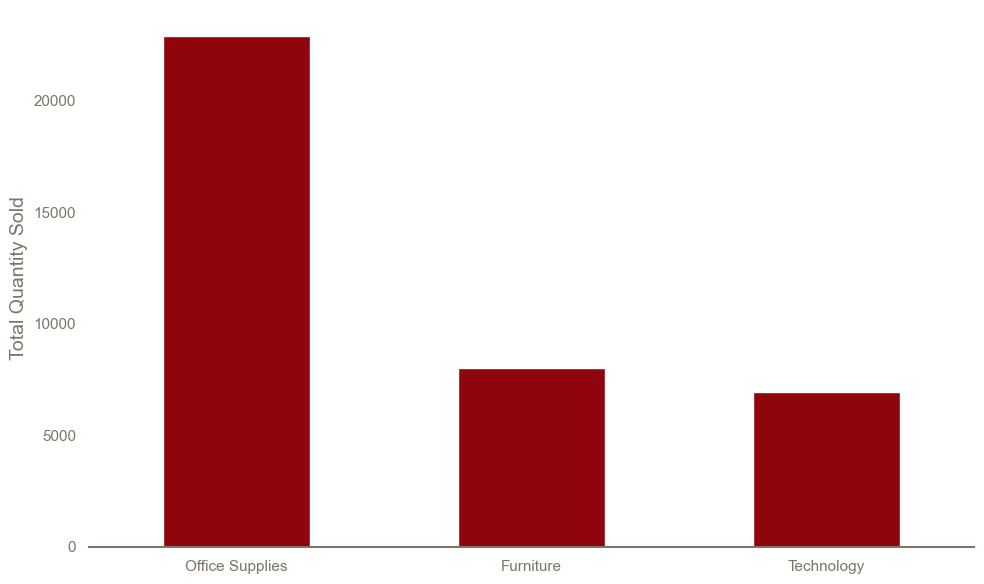

In [391]:
# Group by Category, sum up Quantity, and sort
quantity_per_category = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Create a bar chart for quantities per category
quantity_per_category.plot(kind='bar', figsize=(10, 6), color='#90040c')  # Updated color

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
# plt.title('Quantity Sold by Category', fontsize=16, color=grey_color)
plt.ylabel('Total Quantity Sold', fontsize=14, color=grey_color)
plt.xlabel('', fontsize=14, color=grey_color)
plt.xticks(rotation=0, color=grey_color)
plt.yticks(color=grey_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().set_facecolor('white')
plt.grid(False)  # Remove gridlines

plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Analysis Section 4: Geographical Analysis

## Explore sales and delivery time by geography

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


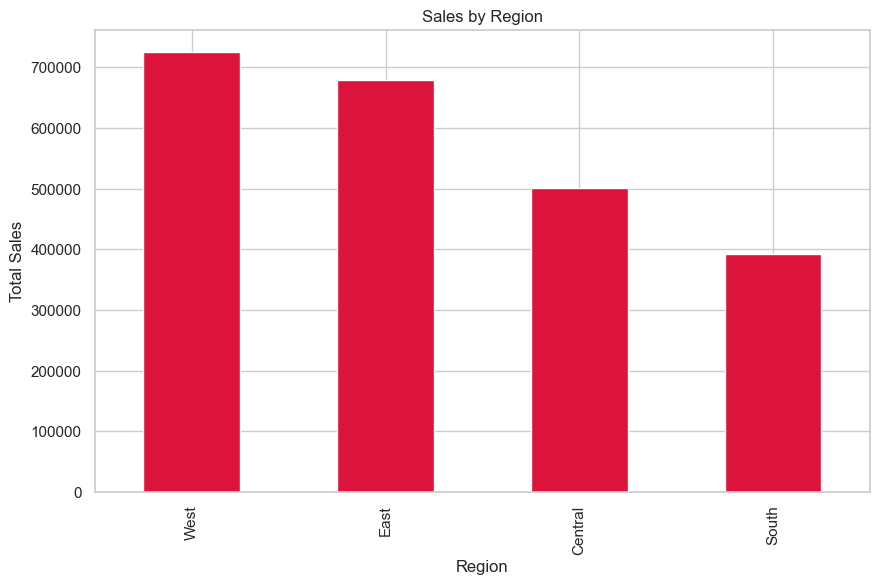

In [392]:
# Aggregate sales by region
sales_by_region = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(sales_by_region)

# Plot sales by region
sales_by_region.plot(kind='bar', figsize=(10, 6), color='crimson')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

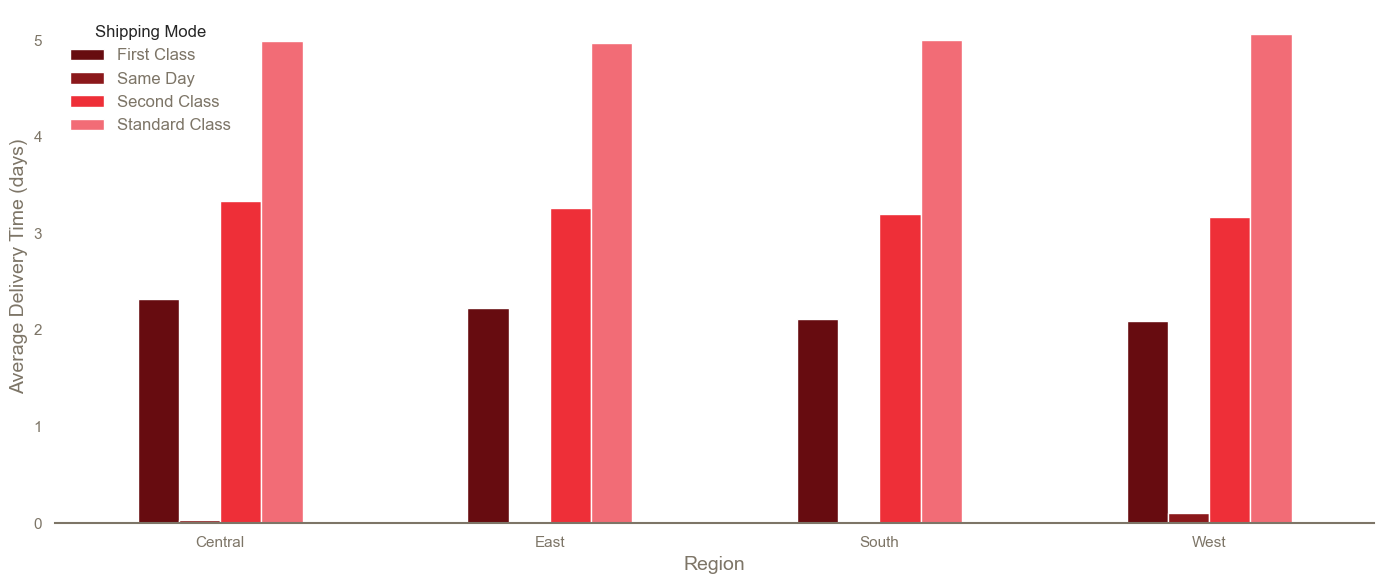

In [393]:
# Group by 'Region' and 'Shipping Mode', calculate mean 'Delivery Time'
average_delivery_by_region_mode = data.groupby(['Region', 'Ship Mode'])['Delivery Time'].mean().unstack()

# Define custom colors for each shipping mode
custom_colors = ['#670c10', '#8b181b', '#ee2f38', '#f26c76']

# Plot average delivery time by region and shipping mode (wider bar chart)
average_delivery_by_region_mode.plot(kind='bar', figsize=(14, 6), color=custom_colors)  # Set custom colors

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
# plt.title('Average Delivery Time by Region and Shipping Mode', fontsize=16, color=grey_color)
plt.xlabel('Region', fontsize=14, color=grey_color)
plt.ylabel('Average Delivery Time (days)', fontsize=14, color=grey_color)
plt.xticks(rotation=0, color=grey_color)  # Rotate x-axis labels and customize color
plt.yticks(color=grey_color)
plt.legend(title='Shipping Mode', title_fontsize=12, fontsize=12, frameon=False, labelcolor=grey_color)  # Customized legend
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().set_facecolor('white')
plt.grid(False)  # Remove gridlines

plt.tight_layout()  # Adjust layout for better fit
plt.show()

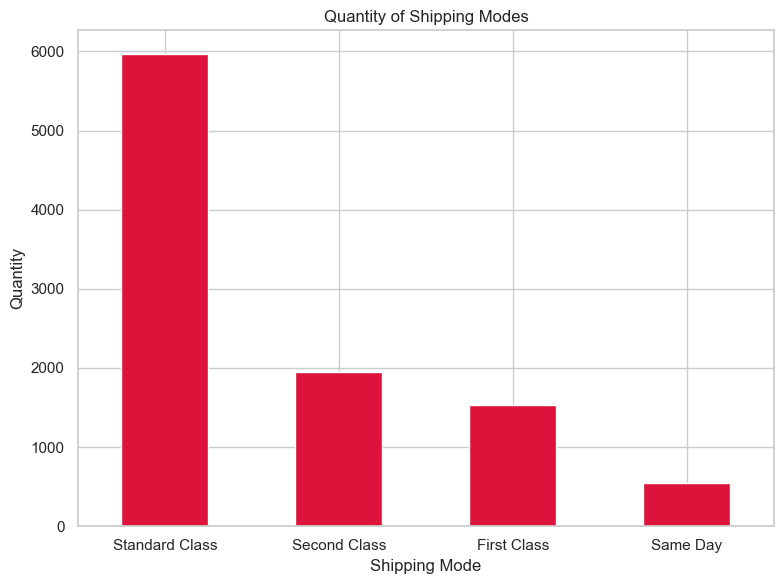

In [394]:
# Count occurrences of each shipping mode
shipping_mode_counts = data['Ship Mode'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
shipping_mode_counts.plot(kind='bar', color='Crimson')
plt.title('Quantity of Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Quantity')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Assess market penetration in various regions 

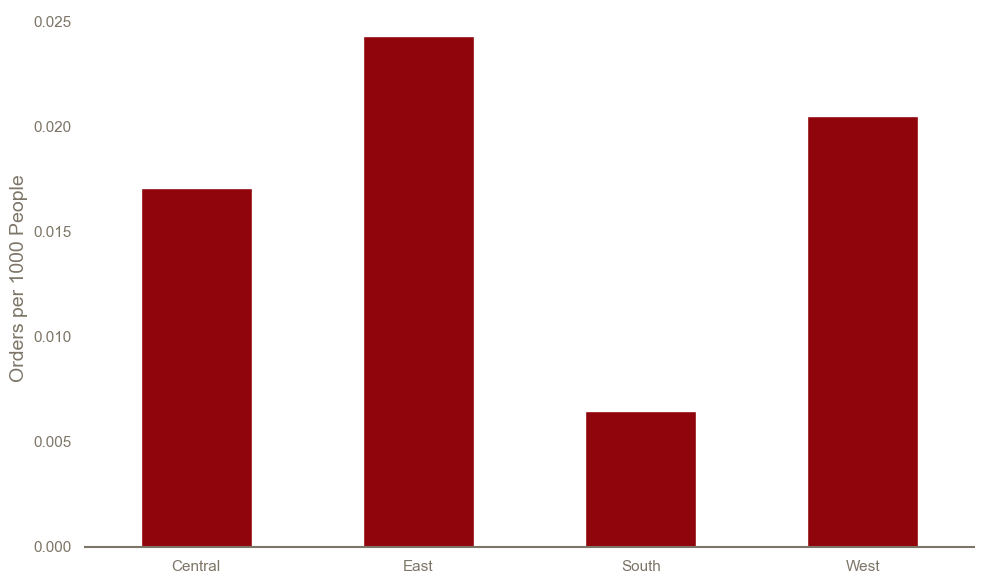

In [395]:
population_data = { # Created populations with data from the US Census 
  'Central': 68850246,  # As of 2020 
  'East': 57609148,  # As of 2020 
  'South': 127353282,  # As of 2020 
  'West': 78602026   # As of 2020 
}

# Convert this to a DataFrame
population_df = pd.DataFrame(list(population_data.items()), columns=['Region', 'Population'])

# Calculate the number of orders per region
orders_per_region = data.groupby('Region')['Order ID'].nunique().reset_index()

# Merge the orders_per_region with the population DataFrame
merged_data = pd.merge(orders_per_region, population_df, on='Region')

# Calculate market penetration as orders per 1000 people
merged_data['Market Penetration (orders per 1000 people)'] = (merged_data['Order ID'] / merged_data['Population']) * 1000

# Plot the market penetration by region
merged_data.plot(x='Region', y='Market Penetration (orders per 1000 people)', kind='bar', figsize=(10, 6), color='#90040c', legend=False)  # Updated color and removed legend

# Customizing the theme
grey_color = '#7D7567'  # The grey color from the image
# plt.title('Market Penetration by Region', fontsize=16, color=grey_color)
plt.xlabel('', fontsize=14, color=grey_color)
plt.ylabel('Orders per 1000 People', fontsize=14, color=grey_color)
plt.xticks(rotation=0, color=grey_color)
plt.yticks(color=grey_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(grey_color)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().set_facecolor('white')
plt.grid(False)  # Remove gridlines

plt.tight_layout()  # Adjust layout for better fit
plt.show()

## Examine normalized regions looking for south discrepencies

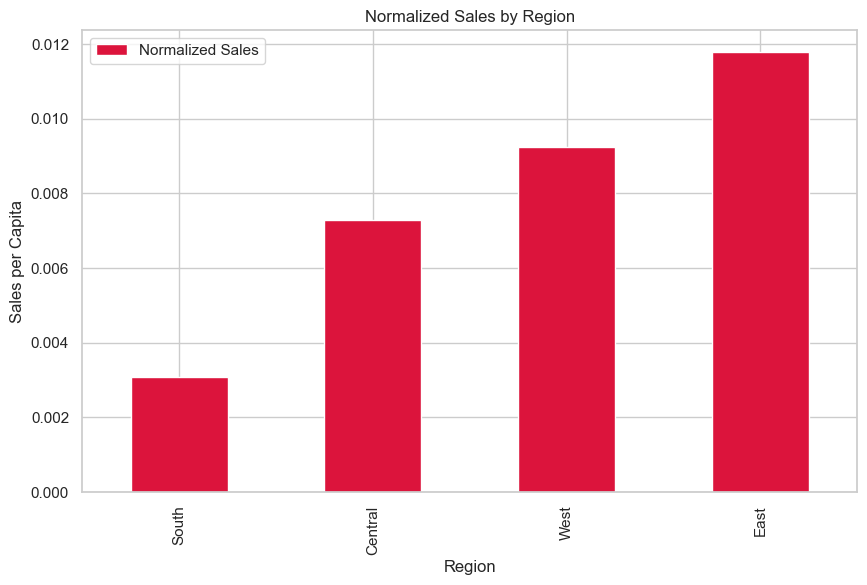

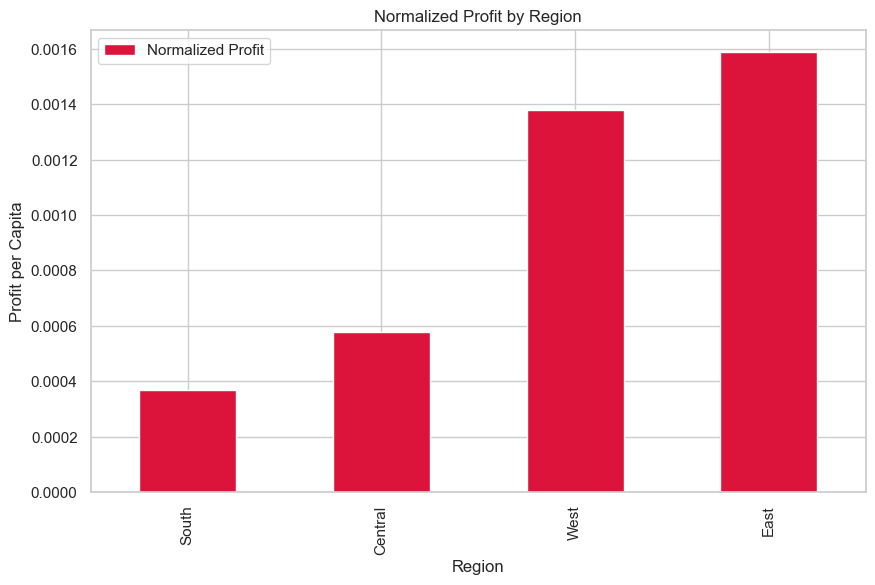

In [396]:
# Aggregate sales and profits by region
region_data = data.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

# Merge the aggregated data with the population DataFrame
region_data = pd.merge(region_data, population_df, on='Region')

# Normalize sales and profits by population
region_data['Normalized Sales'] = region_data['Sales'] / region_data['Population']
region_data['Normalized Profit'] = region_data['Profit'] / region_data['Population']

# Sort by Normalized Sales for better visualization
region_data_sorted_sales = region_data.sort_values('Normalized Sales')

# Sort by Normalized Profit for better visualization
region_data_sorted_profit = region_data.sort_values('Normalized Profit')

# Plotting Normalized Sales
region_data_sorted_sales.plot(x='Region', y='Normalized Sales', kind='bar', color='crimson', figsize=(10, 6))
plt.title('Normalized Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales per Capita')
plt.show()

# Plotting Normalized Profit
region_data_sorted_profit.plot(x='Region', y='Normalized Profit', kind='bar', color='crimson', figsize=(10, 6))
plt.title('Normalized Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit per Capita')
plt.show()